# Predicting WHO Life expectancies
## Phase 1: Data Preparation & Visualisation
#### Group name: Project Group 137
#### Group members: Steven Nguyen
#### Student ID: s3874130


## Table of Contents
* [Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)

## Introduction <a id='itr'></a>

### Dataset Source

This dataset was retrieved from OpenML under dataset ID: 43505. It was originally formatted in .arff but had been converted to .csv for the purpose of this report. This dataset contains data from UNESCO (United Nations Educational Scientific and Cultural Organisation) AND WHO (World Health Organisation) databases.

### Dataset Details

This dataset is about the life expectancy of people from 183 different countries around the world. There are almost an unlimited amount of factors that contribute to the life expectancy of humans, but for this sake of this report, only the most impactful factors have been considered on a generalistic scale. This dataset covers life expectancy from years 2000 - 2016. 

There are a total of 32 features in this dataset which includes 3111 observations. There are many NULL observations in a couple of the features as those have been left on purpose by the creator to allow the user to deal with those variables. 

**Dataset Retrieval**

- The csv file has been uploaded along with the jupyter notebook report
- We are going to display 10 randomly sampled rows from this dataset.

In [6]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')



In [7]:
df = pd.read_csv('Phase1_group137.csv')
df.sample(10, random_state = 999)

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
369,Senegal,SEN,Africa,2012,65.06149,16.61662,199.58470,0.040395,0.005175,0.27001,22.8,10.2,1.4,91.0,83.0,83.0,91.0,74.56811,NaN,NaN,2180.0,1.21008,4.22773,13401.992,39.3,65.44800,0.5,2810.0,NaN,4.73316,NaN,NaN
2749,Timor-Leste,TLS,South-East Asia,2012,67.60051,16.87595,159.04390,0.048130,0.002455,0.48846,20.9,11.4,2.9,83.0,73.0,83.0,83.0,68.04977,NaN,NaN,7690.0,0.72145,1.21629,1132.994,48.2,67.72000,NaN,6760.0,NaN,1.24775,NaN,NaN
1840,Turkmenistan,TKM,Europe,2004,64.67874,16.53879,223.75130,0.058425,0.003760,2.57757,25.1,3.5,2.2,96.0,97.0,98.0,97.0,89.99335,26.130,NaN,4950.0,2.42143,10.57751,4703.401,59.4,64.69300,NaN,4940.0,NaN,NaN,NaN,NaN
2002,Poland,POL,Europe,2013,76.99927,21.37384,120.88260,0.004400,0.000200,10.79606,26.4,2.0,7.6,96.0,98.0,95.0,99.0,98.36996,22.340,0.94461,22300.0,4.48166,6.37548,38158.041,4.5,77.00000,NaN,23890.0,0.5,4.94011,NaN,12.94171
1545,Oman,OMN,Eastern Mediterranean,2015,76.81204,21.02248,97.96933,0.008900,0.000400,0.42306,26.3,7.0,14.3,99.0,99.0,99.0,99.0,91.56680,20.889,NaN,NaN,3.84882,4.30440,4267.348,9.7,76.88700,0.2,41060.0,NaN,NaN,93.03861,9.55618
2729,Thailand,THA,South-East Asia,2009,73.72401,21.01440,164.14890,0.013035,0.000535,6.74000,23.7,8.5,7.0,98.0,98.0,99.0,99.0,97.38845,3.387,NaN,11100.0,2.64682,3.61940,66866.839,12.1,73.76600,1.5,11780.0,0.2,3.86194,NaN,NaN
1200,Costa Rica,CRI,Americas,2010,78.26697,23.17162,106.47690,0.008375,0.000355,3.74594,26.8,1.8,9.5,89.0,83.0,93.0,88.0,98.19809,23.057,NaN,11840.0,5.86721,8.11340,4577.378,8.7,78.76900,0.3,12230.0,1.5,6.63445,NaN,8.35297
1926,Slovakia,SVK,Europe,2005,74.22897,19.07916,139.99020,0.006645,0.000375,11.06067,25.7,1.5,3.8,99.0,98.0,99.0,99.0,97.96682,30.224,NaN,15760.0,4.90662,6.59792,5398.963,6.8,73.90488,0.1,16160.0,0.2,3.76522,NaN,NaN
2850,Tonga,TON,Western Pacific,2011,72.79917,18.46247,140.79430,0.015450,0.000630,0.96031,31.9,0.1,21.7,99.0,99.0,99.0,99.0,99.48015,NaN,NaN,5210.0,2.64346,3.85727,103.562,15.0,70.14800,NaN,5300.0,NaN,NaN,99.38553,10.92791
540,Equatorial Guinea,GNQ,Africa,2013,58.07824,16.68534,327.09250,0.075995,0.007665,8.88012,23.8,8.7,1.8,NaN,51.0,57.0,53.0,63.67152,NaN,NaN,23240.0,0.42721,1.87567,1076.413,72.4,56.64200,6.3,23370.0,NaN,NaN,NaN,NaN


### Target Feature

The aim of this project is to predict the country with the highest life expectancy by analysing which categorical variables have the biggest impact on life expectancy.

## Goals and Objectives

Over the last couple of centuries, the life expectancy of humans has been increasing. In order to study the reasons why this is happening, we must observe different variables associated with the preservation of life. For instance, Doctors may be able to provide scientific evidence for their patients by matching their patient's lifestyle with these variables. As a result of this, a predictive modelling can be created based on data from patients across the world. In this sense, we are able to arrive at a predictive conclusion as to why there are countries that have higher life expectancy than others by comparing these categorical variables. 

The main objective here is to:

1. Predict life expectancy of a person based on the categorical indicators related to life expectancy.
2. Which variables contribute to the more prosperous lifestyles resulting in longer life expectancies.

## Data Cleaning Steps

This section is specific to re-organising the data to cleanse variables that are not relevant to the goals of this report.

### Data Cleaning Steps

* Drop irrelevant variables
* Checking for missing values / re-organise missing values
* Discretizing numeric features
* Random sampling for 1000 different rows

The first step is to display all the columns in the dataset.

In [8]:
df.columns.to_list()

['country',
 'country_code',
 'region',
 'year',
 'life_expect',
 'life_exp60',
 'adult_mortality',
 'infant_mort',
 'age1-4mort',
 'alcohol',
 'bmi',
 'age5-19thinness',
 'age5-19obesity',
 'hepatitis',
 'measles',
 'polio',
 'diphtheria',
 'basic_water',
 'doctors',
 'hospitals',
 'gni_capita',
 'gghe-d',
 'che_gdp',
 'une_pop',
 'une_infant',
 'une_life',
 'une_hiv',
 'une_gni',
 'une_poverty',
 'une_edu_spend',
 'une_literacy',
 'une_school']

By looking at all the columns above, it is necessary to filter out redundant features. Such an example is `country` and `country_code`. 

In [9]:
# drop irrelevant repeated columns
df = df.drop(columns=["country_code"])

In [10]:
df.sample(10, random_state = 999)

,country,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
369,Senegal,Africa,2012,65.06149,16.61662,199.58470,0.040395,0.005175,0.27001,22.8,10.2,1.4,91.0,83.0,83.0,91.0,74.56811,NaN,NaN,2180.0,1.21008,4.22773,13401.992,39.3,65.44800,0.5,2810.0,NaN,4.73316,NaN,NaN
2749,Timor-Leste,South-East Asia,2012,67.60051,16.87595,159.04390,0.048130,0.002455,0.48846,20.9,11.4,2.9,83.0,73.0,83.0,83.0,68.04977,NaN,NaN,7690.0,0.72145,1.21629,1132.994,48.2,67.72000,NaN,6760.0,NaN,1.24775,NaN,NaN
1840,Turkmenistan,Europe,2004,64.67874,16.53879,223.75130,0.058425,0.003760,2.57757,25.1,3.5,2.2,96.0,97.0,98.0,97.0,89.99335,26.130,NaN,4950.0,2.42143,10.57751,4703.401,59.4,64.69300,NaN,4940.0,NaN,NaN,NaN,NaN
2002,Poland,Europe,2013,76.99927,21.37384,120.88260,0.004400,0.000200,10.79606,26.4,2.0,7.6,96.0,98.0,95.0,99.0,98.36996,22.340,0.94461,22300.0,4.48166,6.37548,38158.041,4.5,77.00000,NaN,23890.0,0.5,4.94011,NaN,12.94171
1545,Oman,Eastern Mediterranean,2015,76.81204,21.02248,97.96933,0.008900,0.000400,0.42306,26.3,7.0,14.3,99.0,99.0,99.0,99.0,91.56680,20.889,NaN,NaN,3.84882,4.30440,4267.348,9.7,76.88700,0.2,41060.0,NaN,NaN,93.03861,9.55618
2729,Thailand,South-East Asia,2009,73.72401,21.01440,164.14890,0.013035,0.000535,6.74000,23.7,8.5,7.0,98.0,98.0,99.0,99.0,97.38845,3.387,NaN,11100.0,2.64682,3.61940,66866.839,12.1,73.76600,1.5,11780.0,0.2,3.86194,NaN,NaN
1200,Costa Rica,Americas,2010,78.26697,23.17162,106.47690,0.008375,0.000355,3.74594,26.8,1.8,9.5,89.0,83.0,93.0,88.0,98.19809,23.057,NaN,11840.0,5.86721,8.11340,4577.378,8.7,78.76900,0.3,12230.0,1.5,6.63445,NaN,8.35297
1926,Slovakia,Europe,2005,74.22897,19.07916,139.99020,0.006645,0.000375,11.06067,25.7,1.5,3.8,99.0,98.0,99.0,99.0,97.96682,30.224,NaN,15760.0,4.90662,6.59792,5398.963,6.8,73.90488,0.1,16160.0,0.2,3.76522,NaN,NaN
2850,Tonga,Western Pacific,2011,72.79917,18.46247,140.79430,0.015450,0.000630,0.96031,31.9,0.1,21.7,99.0,99.0,99.0,99.0,99.48015,NaN,NaN,5210.0,2.64346,3.85727,103.562,15.0,70.14800,NaN,5300.0,NaN,NaN,99.38553,10.92791
540,Equatorial Guinea,Africa,2013,58.07824,16.68534,327.09250,0.075995,0.007665,8.88012,23.8,8.7,1.8,NaN,51.0,57.0,53.0,63.67152,NaN,NaN,23240.0,0.42721,1.87567,1076.413,72.4,56.64200,6.3,23370.0,NaN,NaN,NaN,NaN


By observing the table above, it is prevelant that there are missing values in the form of `NaN`. We need to check these values and either impute them or drop them.

In [11]:
# The sum of all cells that contain NaN for each column and row
df.isna().sum()

country               0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64

From the data above, there are many instances where there are missing values and this is expected as some of these variables' data are hard to collect. For simplicity it is easier to just drop all the rows with `NaN` values.

In [12]:
# Dropping all rows that contain NaN
df.dropna()

,country,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
1339,Chile,Americas,2013,79.18864,23.19807,89.92947,0.007380,0.000300,7.23000,27.7,0.8,13.9,90.0,90.0,90.0,91.0,99.15830,18.806,1.04429,21030.0,3.54739,7.44478,17571.507,7.1,79.349,0.4,21470.0,0.9,4.52943,96.26706,10.43700
1560,Pakistan,Eastern Mediterranean,2013,65.78977,17.78212,167.53660,0.071395,0.004495,0.05074,23.7,19.9,2.4,65.0,68.0,65.0,65.0,90.15339,8.771,0.53035,4920.0,0.70267,2.60280,191260.806,65.4,66.117,0.1,4630.0,6.1,2.49344,55.59499,4.92937


However, there is a problem with the data as only 2 countries contain data that is clear from `NaN` values. To optimise this, we are going to remove the columns that contain `NaN` values of 3 digits or more to see if this can be cleaned up.

In [13]:
# Removing a select few of columns that are irrelevant to the data
df = df.drop(columns=["gni_capita", "hepatitis","doctors","hospitals","gni_capita","gghe-d","che_gdp","une_hiv","une_gni","une_poverty","une_edu_spend","une_literacy","une_school"])
df.sample(10, random_state = 999)

,country,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,une_pop,une_infant,une_life
369,Senegal,Africa,2012,65.06149,16.61662,199.58470,0.040395,0.005175,0.27001,22.8,10.2,1.4,83.0,83.0,91.0,74.56811,13401.992,39.3,65.44800
2749,Timor-Leste,South-East Asia,2012,67.60051,16.87595,159.04390,0.048130,0.002455,0.48846,20.9,11.4,2.9,73.0,83.0,83.0,68.04977,1132.994,48.2,67.72000
1840,Turkmenistan,Europe,2004,64.67874,16.53879,223.75130,0.058425,0.003760,2.57757,25.1,3.5,2.2,97.0,98.0,97.0,89.99335,4703.401,59.4,64.69300
2002,Poland,Europe,2013,76.99927,21.37384,120.88260,0.004400,0.000200,10.79606,26.4,2.0,7.6,98.0,95.0,99.0,98.36996,38158.041,4.5,77.00000
1545,Oman,Eastern Mediterranean,2015,76.81204,21.02248,97.96933,0.008900,0.000400,0.42306,26.3,7.0,14.3,99.0,99.0,99.0,91.56680,4267.348,9.7,76.88700
2729,Thailand,South-East Asia,2009,73.72401,21.01440,164.14890,0.013035,0.000535,6.74000,23.7,8.5,7.0,98.0,99.0,99.0,97.38845,66866.839,12.1,73.76600
1200,Costa Rica,Americas,2010,78.26697,23.17162,106.47690,0.008375,0.000355,3.74594,26.8,1.8,9.5,83.0,93.0,88.0,98.19809,4577.378,8.7,78.76900
1926,Slovakia,Europe,2005,74.22897,19.07916,139.99020,0.006645,0.000375,11.06067,25.7,1.5,3.8,98.0,99.0,99.0,97.96682,5398.963,6.8,73.90488
2850,Tonga,Western Pacific,2011,72.79917,18.46247,140.79430,0.015450,0.000630,0.96031,31.9,0.1,21.7,99.0,99.0,99.0,99.48015,103.562,15.0,70.14800
540,Equatorial Guinea,Africa,2013,58.07824,16.68534,327.09250,0.075995,0.007665,8.88012,23.8,8.7,1.8,51.0,57.0,53.0,63.67152,1076.413,72.4,56.64200


Now that some unecessary features have been removed, we can observe the table again for missing values.

In [14]:
# Dropping every NaN value
df = df.dropna()
df.sample(10, random_state = 999)

,country,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,une_pop,une_infant,une_life
2759,Australia,Western Pacific,2005,80.96873,24.03159,68.12927,0.004690,0.000225,10.30000,26.7,0.7,10.6,94.0,92.0,92.0,99.77814,20178.540,4.8,80.84146
549,Kenya,Africa,2005,55.22525,16.72654,437.66490,0.055615,0.007855,0.87938,22.4,8.7,0.8,69.0,70.0,76.0,50.90902,36624.895,49.6,54.73200
2721,Thailand,South-East Asia,2001,70.91342,20.40177,200.51060,0.019370,0.000820,5.84362,23.0,9.5,3.4,94.0,97.0,96.0,94.07426,63539.196,17.7,70.83200
2411,United Kingdom of Great Britain and Northern I...,Europe,2014,81.42310,24.30686,68.06020,0.003860,0.000170,9.45024,27.1,0.7,10.1,93.0,95.0,95.0,100.00000,65423.047,3.9,81.30488
1745,Armenia,Europe,2011,73.59209,19.14928,135.21890,0.015555,0.000505,4.07280,26.1,2.0,3.7,97.0,96.0,95.0,98.59529,2876.538,15.7,73.57200
1724,Albania,Europe,2007,74.06049,19.15334,101.32260,0.017085,0.000490,5.46139,25.8,1.7,3.9,97.0,99.0,98.0,87.91208,3033.998,14.9,75.64600
1414,Djibouti,Eastern Mediterranean,2003,58.01141,16.83849,324.88370,0.075815,0.005095,0.51648,23.6,6.1,3.3,66.0,68.0,68.0,75.54113,759.641,75.0,57.42700
2990,Mongolia,Western Pacific,2015,69.64532,17.22114,212.93010,0.015145,0.000680,8.39823,26.1,2.2,4.0,98.0,99.0,99.0,81.78810,2998.439,15.9,69.11100
2634,India,South-East Asia,2016,68.82572,18.01512,178.03850,0.036820,0.002235,2.96659,21.8,26.9,2.0,88.0,86.0,88.0,91.85928,1324517.249,33.2,68.89700
1025,Mexico,Americas,2005,75.01183,21.35730,133.57630,0.018125,0.000765,5.02781,27.2,1.8,10.9,96.0,98.0,98.0,92.61166,106005.203,17.5,75.30000


It is important to note that some of the columns are not suitable for mapping on plots. To fix this, we must rename the columns to easier terms in order to map the data properly.

In [15]:
# Converting every column name to lower case and stripping each line to make iterations easier
df.columns = df.columns.str.lower().str.strip()
renamed_columns = {
    "age1-4mort": "ages_1_to_4_mort",
    "age5-19thinness": "age_1_to_5_thiness",
    "age5-19obesity": "age_5_to_19_obesity",
}

# Renaming the columns

df = df.rename(columns = renamed_columns)
df.sample(10, random_state = 999)

,country,region,year,life_expect,life_exp60,adult_mortality,infant_mort,ages_1_to_4_mort,alcohol,bmi,age_1_to_5_thiness,age_5_to_19_obesity,measles,polio,diphtheria,basic_water,une_pop,une_infant,une_life
2759,Australia,Western Pacific,2005,80.96873,24.03159,68.12927,0.004690,0.000225,10.30000,26.7,0.7,10.6,94.0,92.0,92.0,99.77814,20178.540,4.8,80.84146
549,Kenya,Africa,2005,55.22525,16.72654,437.66490,0.055615,0.007855,0.87938,22.4,8.7,0.8,69.0,70.0,76.0,50.90902,36624.895,49.6,54.73200
2721,Thailand,South-East Asia,2001,70.91342,20.40177,200.51060,0.019370,0.000820,5.84362,23.0,9.5,3.4,94.0,97.0,96.0,94.07426,63539.196,17.7,70.83200
2411,United Kingdom of Great Britain and Northern I...,Europe,2014,81.42310,24.30686,68.06020,0.003860,0.000170,9.45024,27.1,0.7,10.1,93.0,95.0,95.0,100.00000,65423.047,3.9,81.30488
1745,Armenia,Europe,2011,73.59209,19.14928,135.21890,0.015555,0.000505,4.07280,26.1,2.0,3.7,97.0,96.0,95.0,98.59529,2876.538,15.7,73.57200
1724,Albania,Europe,2007,74.06049,19.15334,101.32260,0.017085,0.000490,5.46139,25.8,1.7,3.9,97.0,99.0,98.0,87.91208,3033.998,14.9,75.64600
1414,Djibouti,Eastern Mediterranean,2003,58.01141,16.83849,324.88370,0.075815,0.005095,0.51648,23.6,6.1,3.3,66.0,68.0,68.0,75.54113,759.641,75.0,57.42700
2990,Mongolia,Western Pacific,2015,69.64532,17.22114,212.93010,0.015145,0.000680,8.39823,26.1,2.2,4.0,98.0,99.0,99.0,81.78810,2998.439,15.9,69.11100
2634,India,South-East Asia,2016,68.82572,18.01512,178.03850,0.036820,0.002235,2.96659,21.8,26.9,2.0,88.0,86.0,88.0,91.85928,1324517.249,33.2,68.89700
1025,Mexico,Americas,2005,75.01183,21.35730,133.57630,0.018125,0.000765,5.02781,27.2,1.8,10.9,96.0,98.0,98.0,92.61166,106005.203,17.5,75.30000


After dropping all the unecessary information, we now must check the data types to observe whether they are the required data (categorical vs numerical).

In [16]:
# Checking the data types
df.dtypes

country                 object
region                  object
year                     int64
life_expect            float64
life_exp60             float64
adult_mortality        float64
infant_mort            float64
ages_1_to_4_mort       float64
alcohol                float64
bmi                    float64
age_1_to_5_thiness     float64
age_5_to_19_obesity    float64
measles                float64
polio                  float64
diphtheria             float64
basic_water            float64
une_pop                float64
une_infant             float64
une_life               float64
dtype: object

The objects are of string type and all of the data is consistent with our goals. By observing the table above, there is no need to further clean our data

In [17]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
df.describe(include='object').T

,count,unique,top,freq
country,3003,181,Angola,17
region,3003,6,Europe,815


In [18]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
year,3003.0,2008.067932,4.881205,2000.000000,2004.000000,2008.000000,2012.000000,2.016000e+03
life_expect,3003.0,69.131120,9.110687,36.227360,63.312700,71.531070,75.477550,8.416616e+01
life_exp60,3003.0,18.905079,2.890311,10.728000,16.616085,18.507650,21.099175,2.639402e+01
adult_mortality,3003.0,193.879186,114.317501,49.201850,108.664150,165.540700,250.474100,6.968742e+02
infant_mort,3003.0,0.032475,0.030171,0.001470,0.008500,0.020190,0.051450,1.645150e-01
ages_1_to_4_mort,3003.0,0.003470,0.005138,0.000065,0.000365,0.000915,0.004735,3.909500e-02
alcohol,3003.0,4.846092,4.013433,0.000000,1.186215,3.984310,7.755450,2.018246e+01
bmi,3003.0,25.058508,2.204786,19.800000,23.200000,25.600000,26.500000,3.220000e+01
age_1_to_5_thiness,3003.0,5.351049,4.641968,0.100000,1.700000,3.800000,7.800000,2.810000e+01
age_5_to_19_obesity,3003.0,5.978055,4.546945,0.100000,2.000000,5.300000,8.900000,2.670000e+01


In [19]:
df.shape

(3003, 19)

### Random Sampling

Random sampling will be done with a subset of 3000 rows. The cleaned data will display 10 random rows.

In [20]:
df = df.sample(n=3000, random_state=999)
df.sample(5, random_state=999)

,country,region,year,life_expect,life_exp60,adult_mortality,infant_mort,ages_1_to_4_mort,alcohol,bmi,age_1_to_5_thiness,age_5_to_19_obesity,measles,polio,diphtheria,basic_water,une_pop,une_infant,une_life
372,Senegal,Africa,2015,66.39928,16.82903,188.8731,0.03554,0.00384,0.24457,22.9,9.6,1.7,80.0,85.0,89.0,78.24334,14578.459,35.1,66.747
1044,Nicaragua,Americas,2007,72.69327,21.34211,170.1312,0.02425,0.00123,3.76520,26.5,2.0,7.4,99.0,93.0,93.0,81.25169,5590.055,20.0,71.673
1670,Lebanon,Eastern Mediterranean,2004,74.83979,19.21090,104.9873,0.01163,0.00050,1.86815,26.7,4.7,10.6,58.0,74.0,75.0,87.22475,4569.000,13.1,76.432
1073,Peru,Americas,2002,72.10473,20.07016,150.1950,0.02613,0.00198,3.92811,25.2,1.4,4.7,95.0,95.0,95.0,82.10076,27100.968,25.5,71.882
803,Argentina,Americas,2004,74.85694,20.46646,127.7558,0.01501,0.00049,7.62589,26.5,1.1,12.5,99.0,91.0,98.0,97.17484,38491.972,15.3,74.280


## Data Exploration and Visualisation

The cleaned dataset is now ready to be analysed.

### One-variable plot



#### Bar Plot of country life expectancies 

In this section here, we are going to plot a bar-plot of the countries 

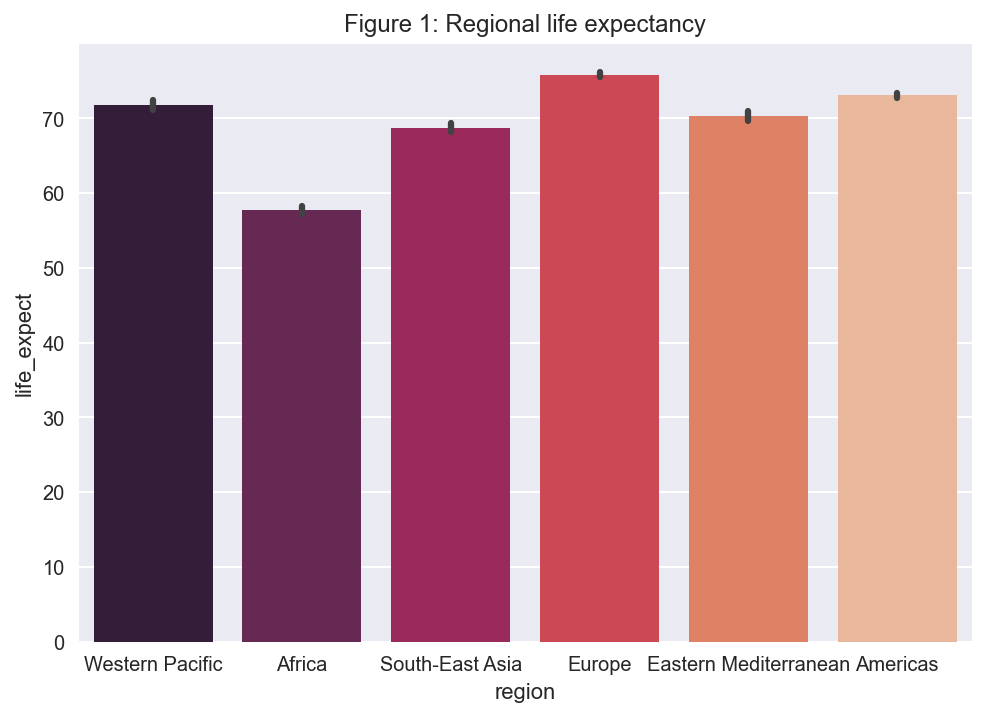

In [21]:
fig = sns.barplot(x='region', y='life_expect', data=df, palette='rocket')

fig = plt.title('Figure 1: Regional life expectancy')

It can be analysed that the Europe region has the highest life expectancy. The lowest life expectancy is considered to be Africa. We shall further analyse as to why this is the case

#### Boxplot and Histogram of Adult mortality

We will now analyse adult mortality rates across the countries. From figures 2A and 2B, it can be concluded that the graphs are right-skewed. It is also determined from the boxplot that there are many outliers in the mortality rate of adults. 

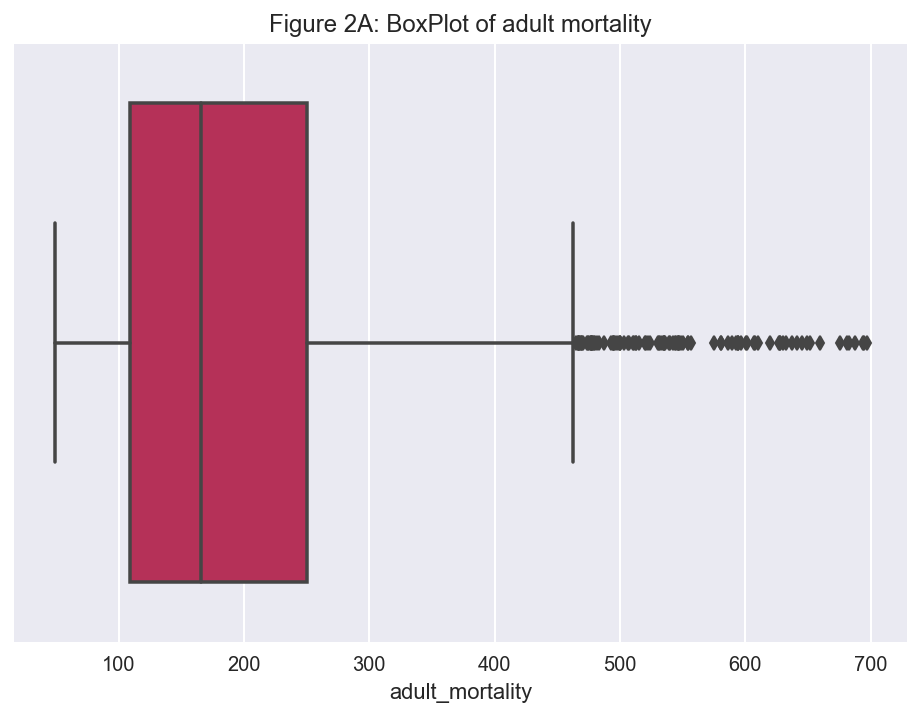

In [22]:
fig2 = sns.boxplot(df['adult_mortality'], palette='rocket')
fig2 = plt.title('Figure 2A: BoxPlot of adult mortality')


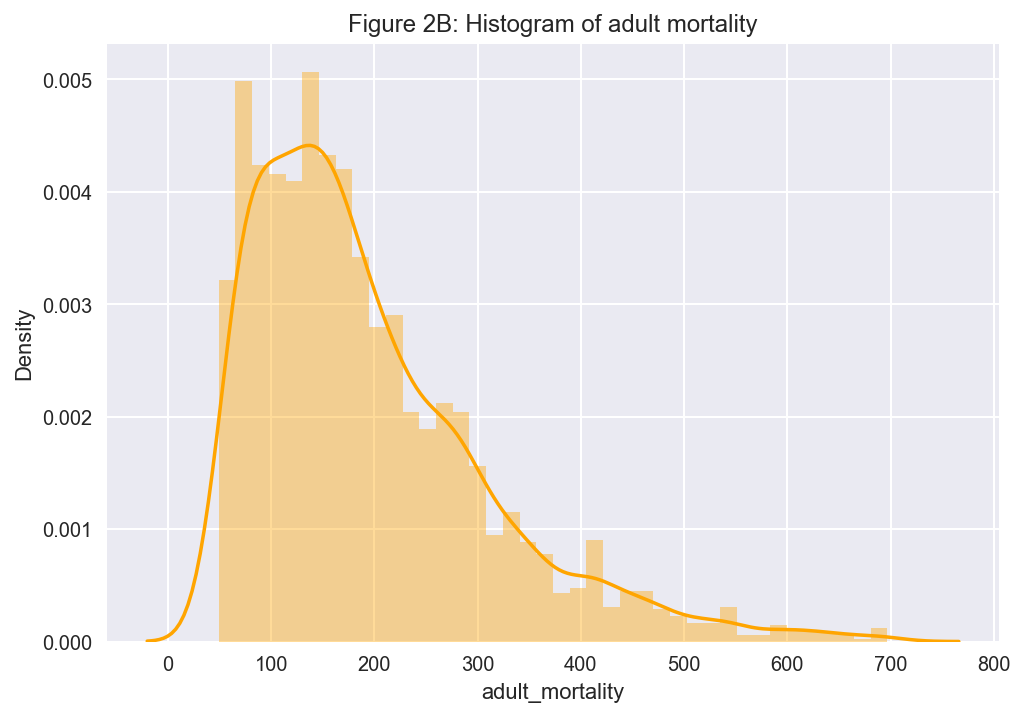

In [23]:
fig3 = sns.distplot(df['adult_mortality'], kde=True, bins=40, color='orange')
fig3 = plt.title('Figure 2B: Histogram of adult mortality')

### Two-variable plot

#### Scatter plots of life expectancy variables

There is a linear correlation between the amount of water a person consumes vs their life expectancy. The data shows that where there is little water in a country, the life expectancy is much lower than countries with higher water intake.

However logical it may sound, this is not the case though for BMI and life expectancies. It can be logically deduced that the higher the BMI count of a person, the lower the life expectancy will be. But as shown in figure 4B, this is not the case as there is lots of data to also suggest that countries with high BMI count may also have fairly healthy people that live to long ages. 

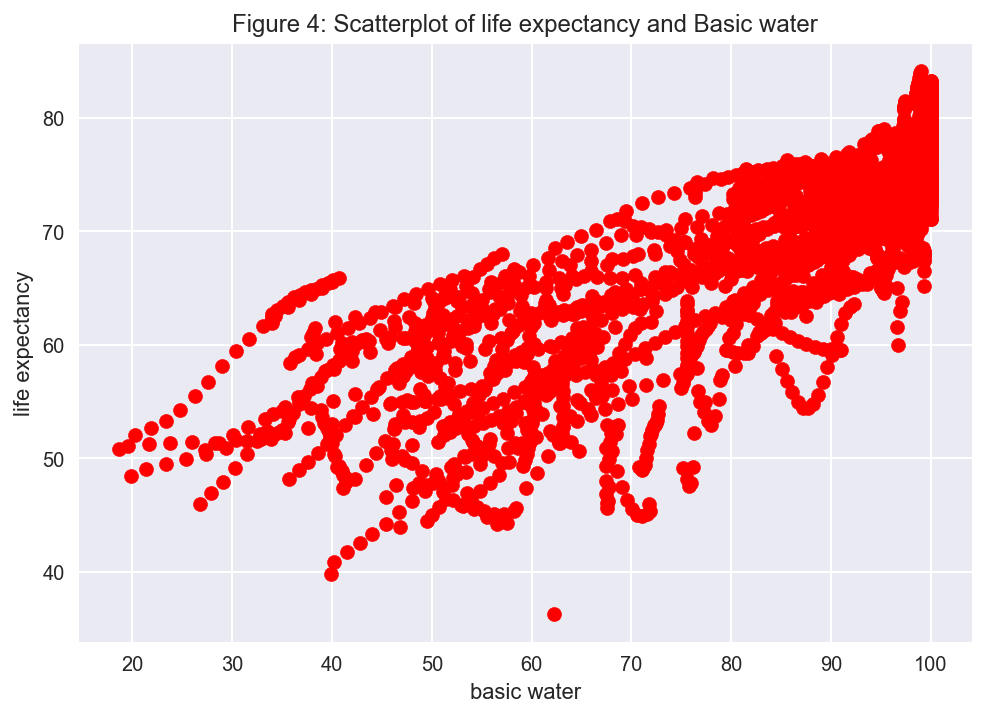

In [24]:
fig4 = plt.scatter(x=df['basic_water'], y=df['life_expect'], color='red')
fig4 = plt.xlabel("basic water")
fig4 = plt.ylabel("life expectancy")
fig4 = plt.title('Figure 4: Scatterplot of life expectancy and Basic water')

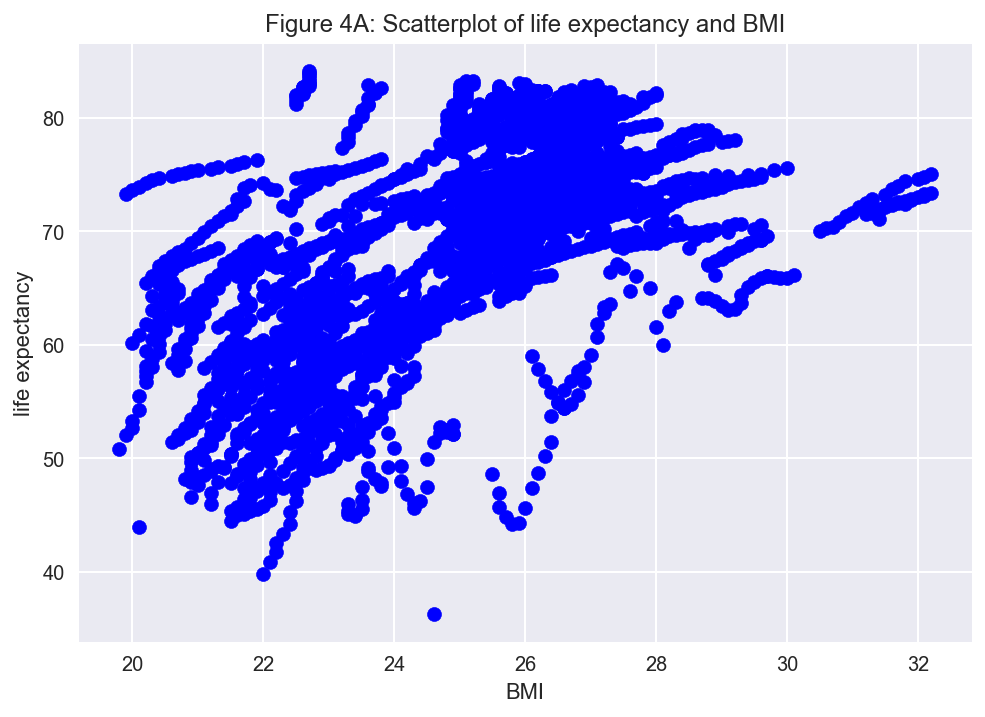

In [25]:
fig4a = plt.scatter(df['bmi'], df['life_expect'], color='blue')
fig4a = plt.xlabel("BMI")
fig4a = plt.ylabel("life expectancy")
fig4a = plt.title('Figure 4A: Scatterplot of life expectancy and BMI')

### Three-variable plots

#### Scatterplot of the life expectancy of a region by BMI

There is a unique feature in figure 5. There is an association with colour contrast getting darker as life_expectancy increases. This data is indicitive to people being able to live longer amounts of years even if their BMI is high as the years go by. 

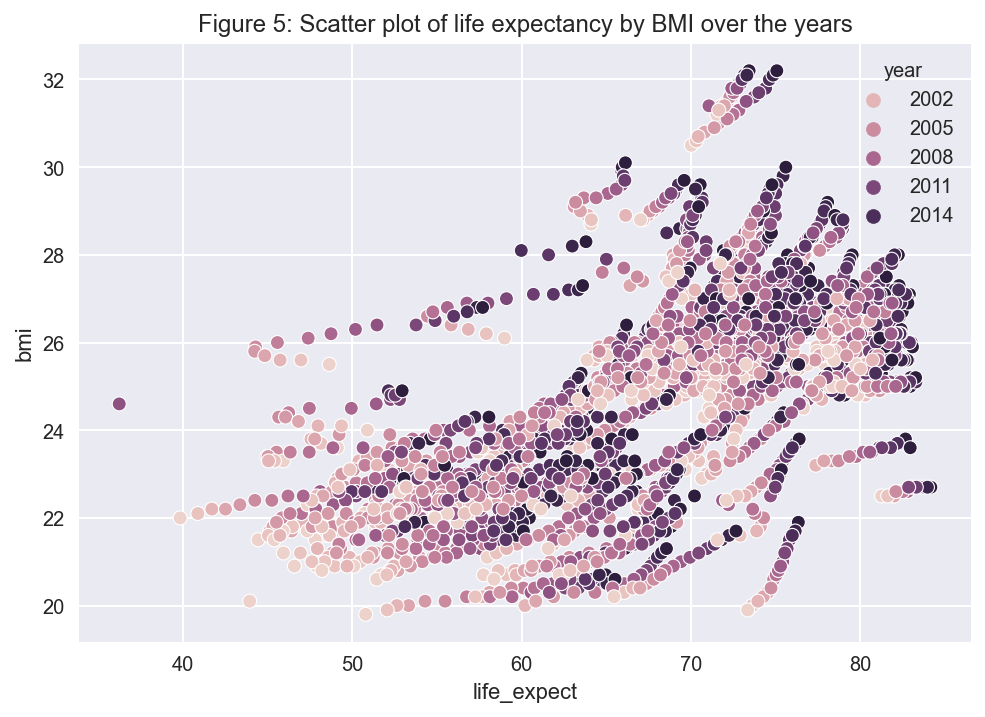

In [26]:
fig5 = sns.scatterplot(data=df, x="life_expect", y="bmi", hue="year")
fig5 = plt.title('Figure 5: Scatter plot of life expectancy by BMI over the years')

#### Boxplot of life expectancy derived from adult mortality rates from different regions.

It is observed that the adult mortality rate plays a big role in determining the life expectancies of each region. It can be deduced that the higher the adult mortality rate, the lower the life expectancy of different regions. As the mortality rates of people in Europe is very low, their life expectancy is also very high compared to that of Africa.

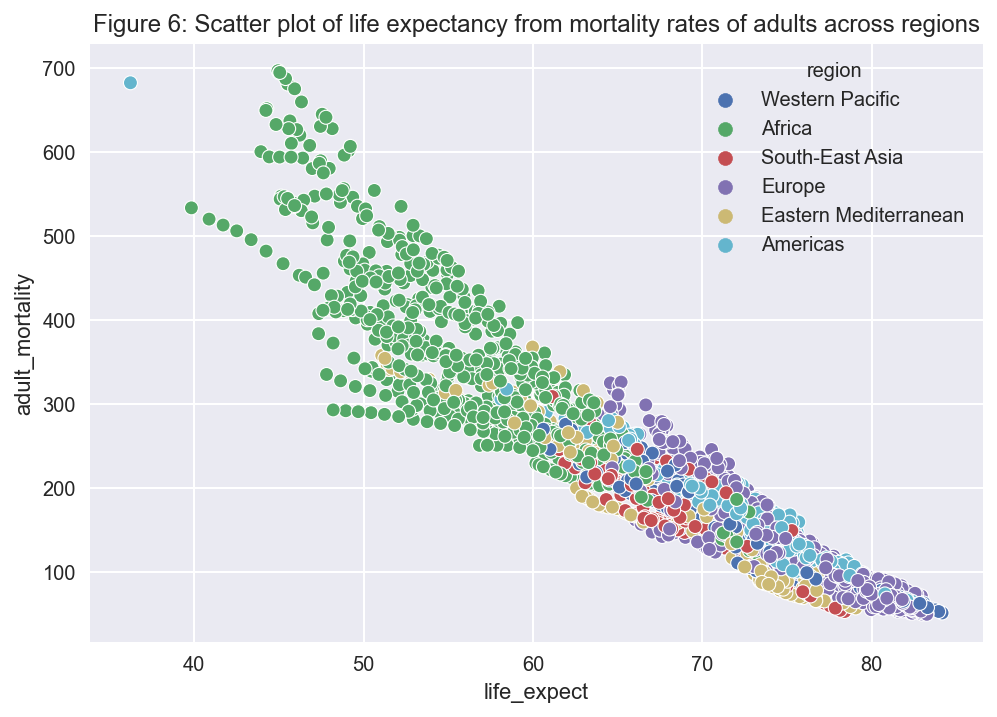

In [27]:
fig6 = sns.scatterplot(data=df, x="life_expect", y="adult_mortality", hue="region")
fig5 = plt.title('Figure 6: Scatter plot of life expectancy from mortality rates of adults across regions')

## Conclusions

The data that we have analysed in report is very broad. It could be used in many different scenarios where we are able to find a relationship between the physical well-being of a person and their environmental factors. The purpose of this project is to hypothesize whether or not it is possible to predict a person's life expectancy based on the data provided. The answer to this is it is possible to determine whether or not it can be concluded that an average person's physical health is related different environmental aspects. Such an example is highlighted in Figure 4, where if a person does not have enough water in their living environment, they are more prone to dying at an earlier age. We can also deduce that over the years, although BMI has increased to an unhealthy position for certain regions, those people are still dying at an older age. A hypothesis for this may be that due to the increase of population, there are major advancements in medicine and technology that would enable regions to live for longer.

This project consisted of data collection research, data cleaning, data preprocessing and data visualisation. The steps involved into the creation of a predictive model was to first remove outliers and unusual outliers. In our case there were a lot of rows which provided `null` elements for their respective columns. So the most simplistic approach to this was to remove the columns which contained more than 3 digits of total `null` elements. In this way, we were able to retain most the rows as most rows contained many `null` values in them. As a result of this, it is acknowledged that the data provided was not as specific as possible due to the cutting of several features. There may be more better ways of handling this in the next phase, for example, imputing the mean or median of different categorical features which contain `null` elements instead of just droppping them.

The visualisation stage of this project was analysed with explanatory variables which lead to our conclusions of predicting life expectancy of people based on their environmental factors. This is shown in the scatter plot of figure 6, where regions like Africa tend to have higher adult mortality rates due to a lot of different environmental factors.

In hindsight, more data features could have been researched and explored as the more features a dataset contains the more accurate the predictive model will become. An improvement to this project could have been to keep the university attendance rates as more university graduates may be correlated to the advancement of technology and GPD growth hence proserping life expectancies in different regions. 

## References

- Mattson, M. WHO national life expectancy (Kaggle). Retrieved October 5, 2022 from https://www.kaggle.com/datasets/mmattson/who-national-life-expectancy?resource=download

In [30]:
df.head()
df.to_csv('Phase2_group137.csv')